In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

# Wine Quality Analysis

***

* freature engineering
* visualization
* analysis

###### The goal of the analysis is to investigate the relationships between different factors and quality of wine.  Also, building models to predict the quality of wine and testing the performace of different models.

***

Citation Request:

  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at:  [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                 [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                 [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

In [241]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [242]:
df.to_csv('wine_clas.csv')

In [243]:
df_old=df.copy()

In [244]:
df=df_old

In [245]:
df.shape

(4898, 12)

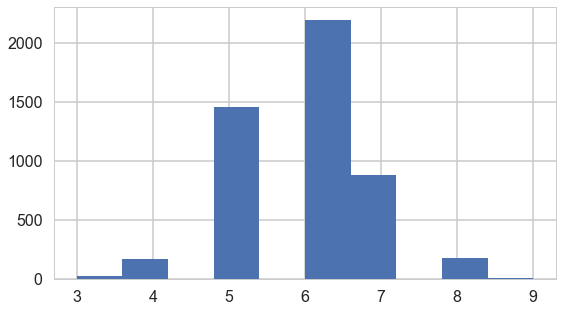

In [246]:
df.quality.hist(figsize=(9,5))

In [247]:
df['target']=(df.quality.values>=7)*1

In [248]:
del df['quality']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [249]:
print 'good wine % all wine ',round(df.target.values.sum()/float( df.shape[0]),3)*100,'%'

good wine % all wine  21.6 %


The percentage above shows the proporation of good wine is much less that of not-good wine

### 0. Training testing split & Standardize data

In [250]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)

In [251]:
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [252]:
mask

array([ True,  True, False, ..., False, False,  True], dtype=bool)

In [253]:
mask.shape,mask.sum()

((4898L,), 3428)

In [254]:
print 'training % of positive',np.mean(df[mask].target)
print 'testing % of positive',np.mean(df[~mask].target)

training % of positive 0.217911318553
testing % of positive 0.212925170068


In [255]:
target=df['target']

In [256]:
df=df.ix[:,:-1]

In [257]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [115]:
# Contents below are wrong
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# n1=np.array(df[mask])
# m1=np.array(df)

# scaler = StandardScaler().fit(n1)
# t1=scaler.transform(m1)   
# df[mask]=pd.DataFrame(t1)
# df[mask].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524825,0.945044,-1.389481,-0.446265,-0.243985,-0.458536,-0.376043,0.564700,1.289494,-0.560425,-0.958075
1,-0.289513,1.958088,-1.389481,0.052073,0.203087,0.900032,0.627907,0.028688,-0.731984,0.109451,-0.576147
2,-0.289513,1.282726,-1.181776,-0.161500,0.081159,-0.070374,0.232412,0.135890,-0.340730,-0.058018,-0.576147
3,1.710635,-1.418723,1.518392,-0.446265,-0.264306,0.123707,0.414948,0.671902,-0.992820,-0.448779,-0.576147
4,-0.524825,0.945044,-1.389481,-0.446265,-0.243985,-0.458536,-0.376043,0.564700,1.289494,-0.560425,-0.958075


In [258]:
for col in cols:
    print col
    valstrain=df[col].values[mask]
    valstest=df[col].values[~mask]
    scaler=StandardScaler().fit(valstrain)
    outtrain=scaler.transform(valstrain)
    outtest=scaler.fit_transform(valstest)
    out=np.empty(mask.shape[0])
    out[mask]=outtrain
    out[~mask]=outtest
    df[col]=out

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [259]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.194705,-0.092730,0.227423,2.760869,-0.033664,0.595171,0.768544,2.284672,-1.267809,-0.361104,-1.404012
1,-0.639905,0.195638,0.060716,-0.935030,0.150901,-1.281057,-0.136393,-0.009177,0.730650,-0.013047,-0.833492
2,1.408704,0.054351,0.505724,0.124747,0.185575,-0.311929,-0.982378,0.377778,0.500481,-0.410255,-0.318699
3,0.354835,-0.485126,-0.142980,0.455458,0.545225,0.628486,1.058633,0.553637,0.042626,-0.767052,-0.480184
4,0.433166,-0.477220,-0.105992,0.400138,0.566171,0.716218,1.149570,0.515131,-0.002118,-0.796174,-0.507481


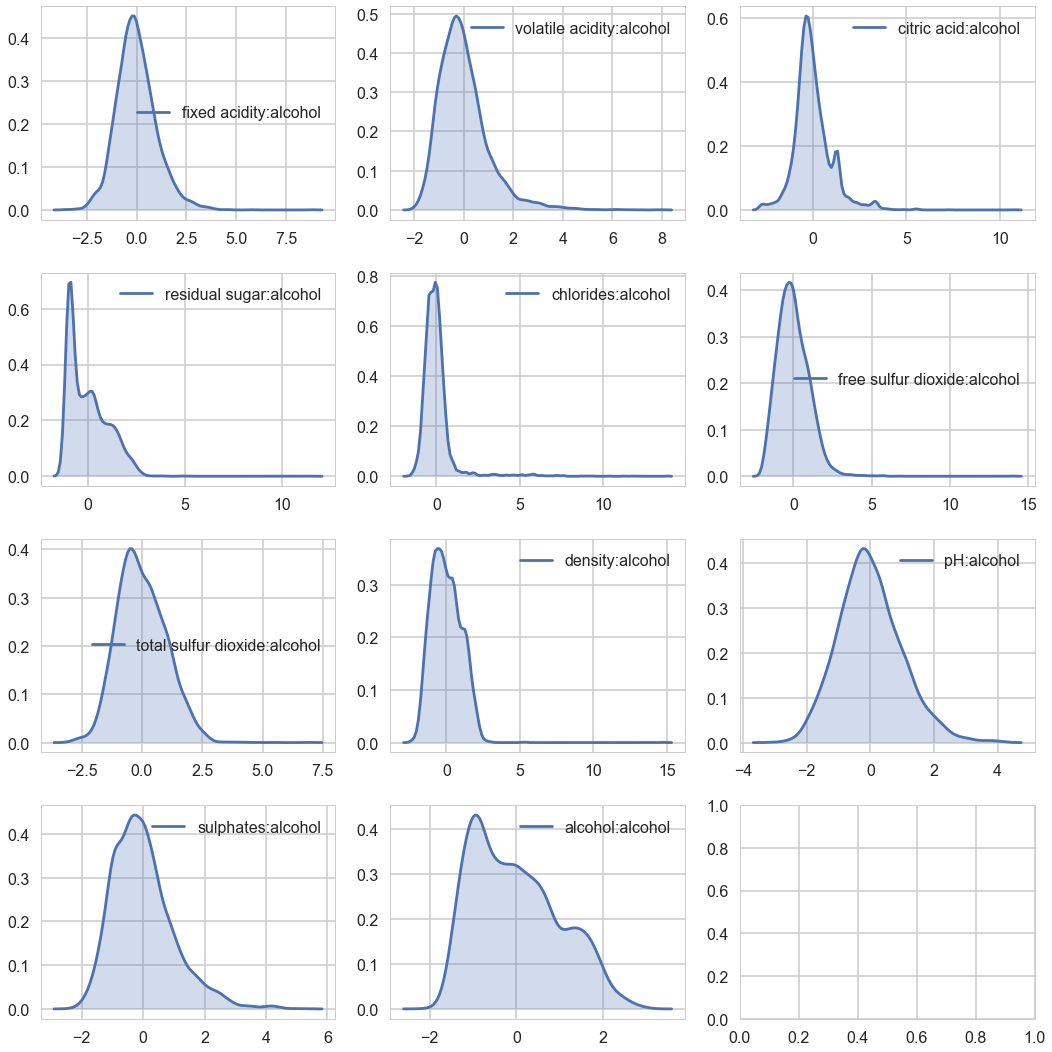

In [260]:
dfgb=df.copy()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), cols):
#     for k, v in dfgb[p]:
        sns.kdeplot(dfgb[p], ax=ax, label=str(p)+":"+v.name,shade=True)

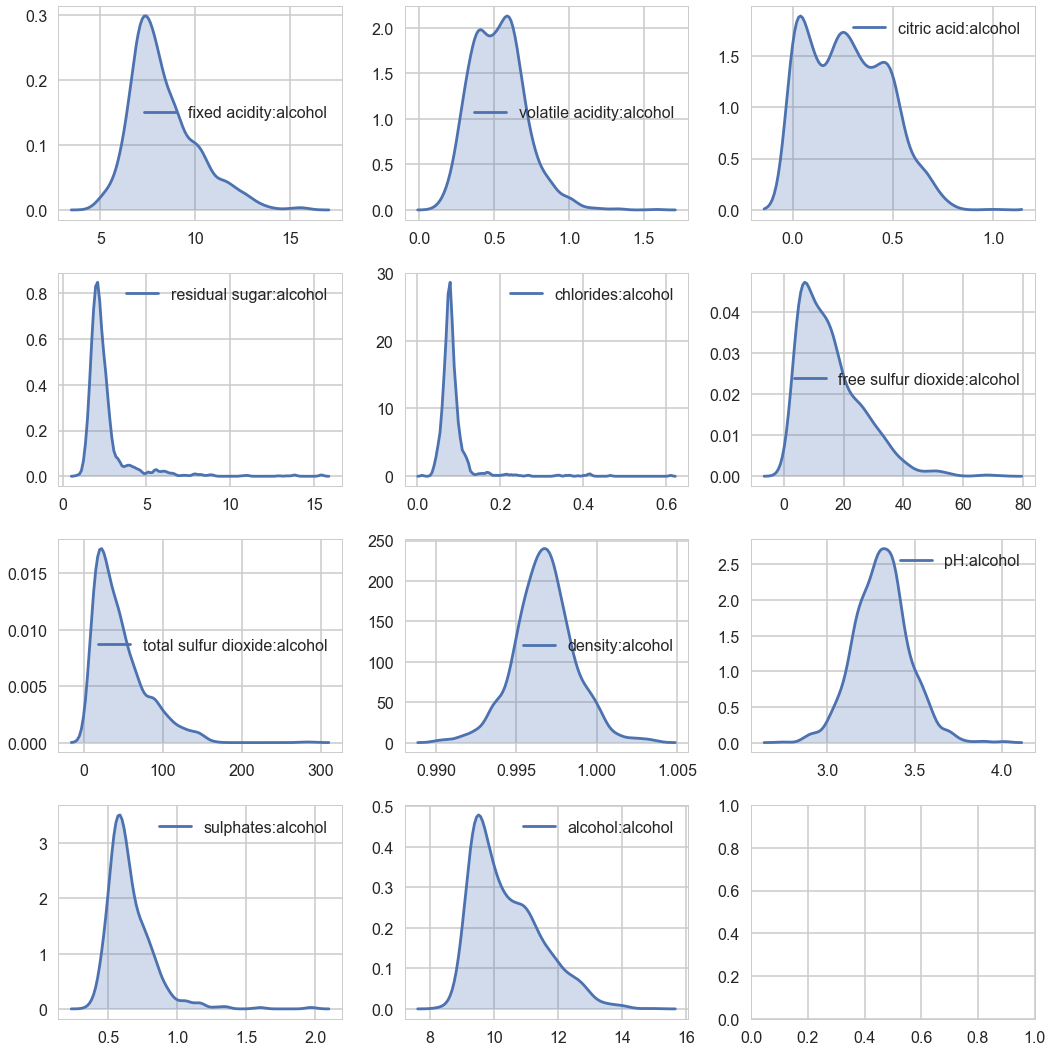

In [192]:
dfgb=df.copy()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), cols):
#     for k, v in dfgb[p]:
        sns.kdeplot(dfgb[p], ax=ax, label=str(p)+":"+v.name,shade=True)

In [261]:
df.alcohol.mean()

1.0395477410240696e-15

In [262]:
df['target']=target

In [263]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,0.194705,-0.092730,0.227423,2.760869,-0.033664,0.595171,0.768544,2.284672,-1.267809,-0.361104,-1.404012,0
1,-0.639905,0.195638,0.060716,-0.935030,0.150901,-1.281057,-0.136393,-0.009177,0.730650,-0.013047,-0.833492,0


### 1. To find the relationship between continous features indivdidually and repsonse variable target.

target
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: pH, dtype: object

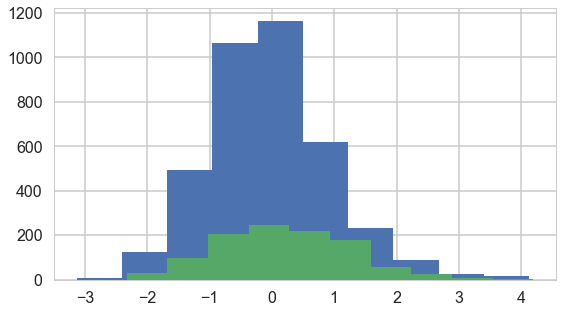

In [264]:
df.groupby('target').pH.hist(figsize=(9,5))

We take a look the pH values with wine classes. So for class of good wine average ph is 3.3 and for bad wine is about the same. 
So the feature pH is not a good feature to separate good wine from bad wine. 

So in the following step we will look more features visiually to detect potentioal predictors.

In [71]:
dfuse=df.copy(deep=True)

In [265]:
cols=np.array(df.columns[:-1])
cols

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], dtype=object)

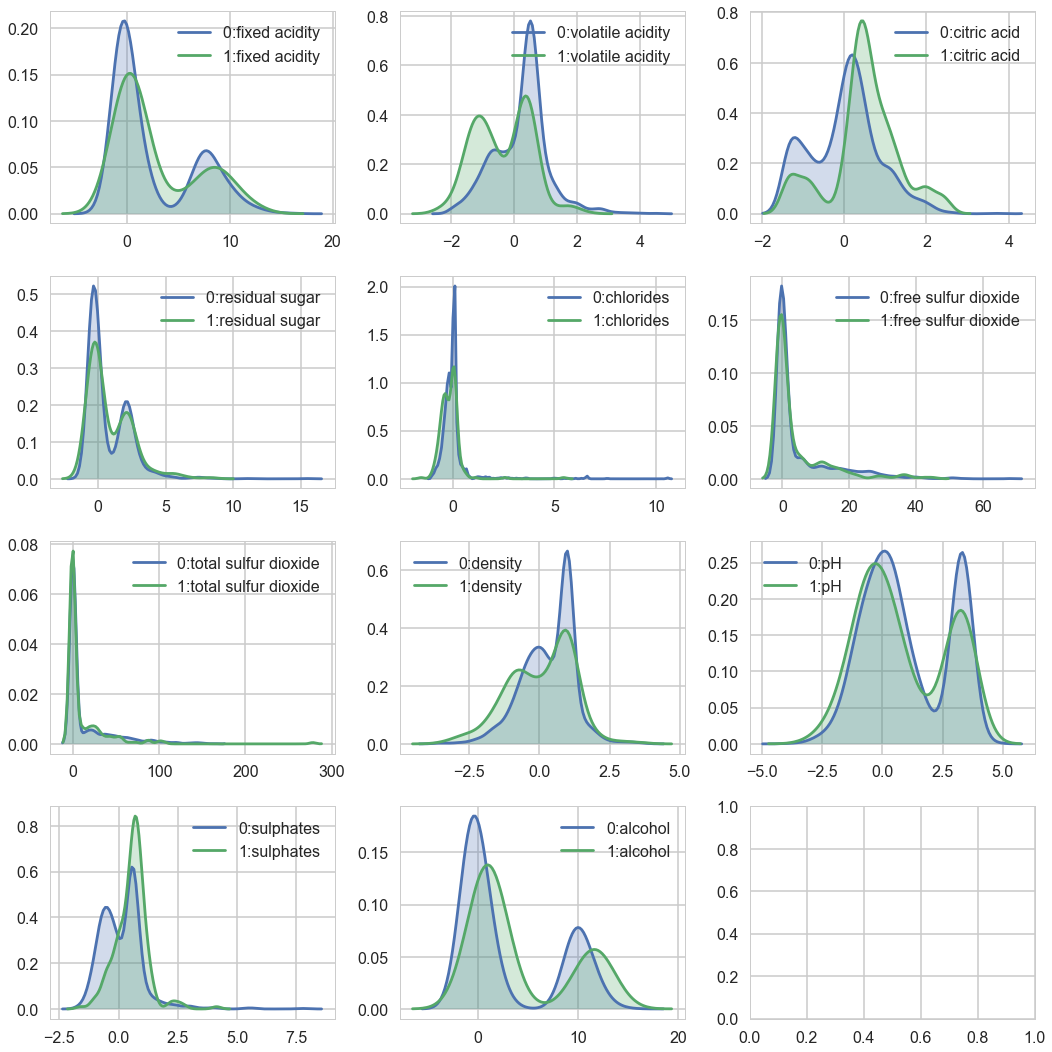

In [266]:
dfgb=dfuse.groupby('target')
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), cols):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name,shade=True)

In the KDE plots we’re looking for variables with very little overlap between the positive and negative results. Some examples are "citric acid" and "volatile acidity". 

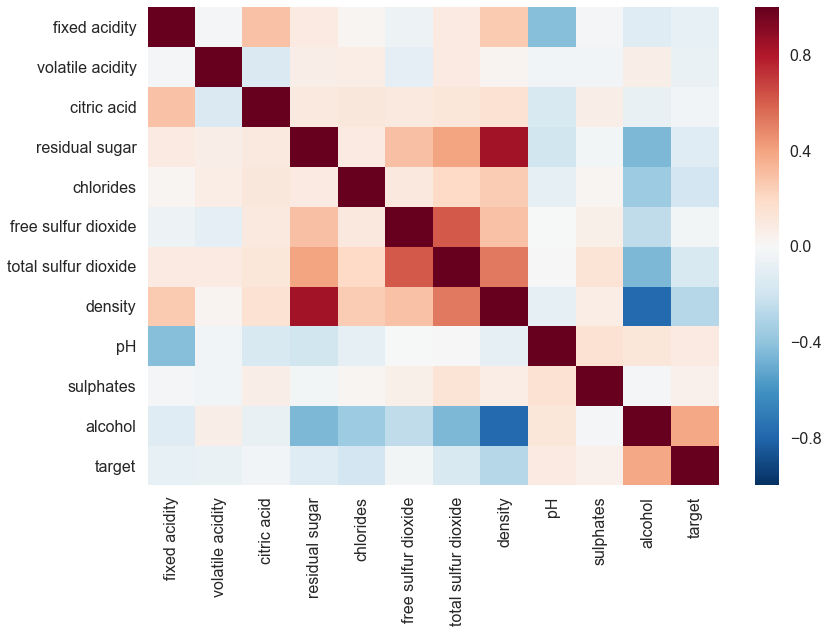

In [267]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 2.Building Models

In [268]:
Xmatrix=df[cols].values
Yresp=df['target'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [23]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Generic classification and optimization functions from last lab
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
#     print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [258]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [30]:
from sklearn.svm import LinearSVC

In [269]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), 
                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, df,cols, 'target',1, mask=mask,score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.81
[[1032  125]
 [ 156  157]]
########################################################
Wall time: 1.88 s


In [270]:
gs=clfsvm
print "BEST", gs.C

BEST 100.0


In [44]:
from sklearn.metrics import roc_curve, auc

In [36]:
from sklearn.svm import SVC

In [275]:
%%time
clfsvc, Xtrain, ytrain, Xtest, ytest = do_classify(SVC(), 
                                                  {"C": [1e5,1e7,1e9],"gamma":[1e-5,1e-07,1e-9]}, df,cols, 'target',1, mask=mask,score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
[[1087   70]
 [ 210  103]]
########################################################
Wall time: 34.8 s


In [277]:
gs=clfsvc
print "BEST", gs.C, gs.gamma

BEST 1000000000.0 1e-05


In [278]:
%%time
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(10, 30),"max_features":range(3,5),"max_depth": [ 4, 5, 6, 7, 8], 'min_samples_leaf': [  3, 4, 5, 6]}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df,cols, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.89
Accuracy on test data:     0.84
[[1096   61]
 [ 181  132]]
########################################################
Wall time: 3min 47s


In [280]:
gs=clfForest
print "BEST", gs.n_estimators, gs.max_features,gs.max_depth,gs.min_samples_leaf

BEST 29 4 8 4


In [289]:
import xgboost as xgb
clfXgb = xgb.XGBClassifier()

In [296]:
%%time
parameters = {"n_estimators": range(1, 20),"reg_alpha":[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clfXgb, Xtrain, ytrain, Xtest, ytest = do_classify(clfXgb, parameters, 
                                                       df,cols,  'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


using mask


C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2

############# based on standard predict ################
Accuracy on training data: 0.90
Accuracy on test data:     0.86
[[395   9]
 [ 58  18]]
########################################################
Wall time: 4.52 s


C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


In [299]:
gs=clfXgb
print "BEST", gs.n_estimators, gs.reg_alpha

BEST 14 10.0


In [271]:
%%time
#your code here
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l1")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100,1e3,1e4]}
clflog, Xtrain, ytrain, Xtest, ytest=do_classify(clflog, parameters,df,cols,  'target',1, mask=mask,score_func='f1')
# average_profit_pp(ytest, clflog.predict(Xtest), u)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.80
[[1072   85]
 [ 215   98]]
########################################################
Wall time: 1.49 s


In [272]:
gs=clflog
print "BEST", gs.C

BEST 10


In [273]:
%%time
#your code here
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l2")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100,1000]}
clflog_2, Xtrain, ytrain, Xtest, ytest=do_classify(clflog, parameters,df,cols,  'target',1, mask=mask,score_func='f1')
# average_profit_pp(ytest, clflog.predict(Xtest), u)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.80
[[1083   74]
 [ 216   97]]
########################################################
Wall time: 368 ms


In [290]:
gs=clflog_2
print "BEST", gs.C

BEST 0.001
